# import dependencies

In [3]:
import pickle as pkl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import data
ENVIRONMENTAL JUSTICE - HOUSEHOLD ENERGY AND TRANSPORTATION BURDEN <br>
https://maps.nrel.gov/slope/data-viewer?filters=%5B%5D&layer=eej.household-energy-burden&year=2020&res=tracts <br>
Household Energy and Transportation Burden Data Description
Household energy and transportation burden data are combined from two sources. For housing energy burden, energy bills that consume more than 6% of a single household’s income are defined to constitute a high energy burden by the 2020 ACEEE Report How High Are Household Energy Burdens? Housing energy burdens of 6% or greater are binned into the highest energy burden bin. The low and medium bins are then divided equally across the remainder of the country. For transportation burden, three equal quantiles are mapped.

1. Housing energy burden data comes from the Low-income Energy Affordability Data (LEAD) Tool, developed by the U.S. Department of Energy and National Renewable Energy Laboratory

Energy burden is defined as the average annual housing energy costs divided by the average annual household income. Monthly housing energy costs are based on household monthly expenditures for electricity, gas (utility and bottled), and other fuels (including fuel oil, wood, etc.). For further data exploration visit the LEAD Tool.

2. Transportation energy burden data comes from the Affordability of Household Transportation Fuel Costs by Region and Socioeconomic Factors 2021 report, conducted by Argonne National Laboratory.

Transportation energy burden is defined as the percentage of annual household income spent on the household vehicle fuel costs (excludes public transit). Transportation burden is calculated for every census tract in the U.S. by combining three metrics (annual household vehicle miles traveled, stock-weighted miles per gallon, and fuel price) with tract-level income data. The Argonne study provides a finer understanding of the spatial variation in household transportation energy burden by connecting VMT, vehicle fuel economy, fuel costs, and income data at the census tract level.

In [4]:
burden_data_path = ".\data\household_energy_burden_baseline\household_energy_burden_baseline_tracts.csv"
df_burden = pd.read_csv(burden_data_path)
df_burden.head()

,Geography ID,Transportation Burden Pct Income,Energy Burden Pct Income
0,G01133965700,0.030750,0.0553
1,G01133965503,0.030264,0.0758
2,G01133965502,0.046644,0.0742
3,G01131035200,0.038904,0.0990
4,G01131035100,0.036439,0.0592


In [5]:
df_burden.shape

(73105, 3)

In [6]:
lead_data_path = ".\data\lead-tool-map-data.csv"
df_lead = pd.read_csv(lead_data_path)
df_lead.head()

,Geography ID,Name,Is Disadvantaged Community?,Energy Burden (% income),Avg. Annual Energy Cost ($),Total Households,Household Income,Black/ African American (% pop.),American Indian/ Native Alaskan (% pop.),Asian (% pop.),Native Hawaiian/ Other Pacific Islander (% pop.),White Hispanic or Latino (% pop.),White Non-Hispanic or Latino (% pop.),Two or More Races (% pop.),Other Races (% pop.),Less Than High School (% pop.),High School (% pop.),Associates or Some College (% pop.),Bachelors or Higher (% pop.)
0,48001950401,"Census Tract 9504.01, Anderson County, Texas",False,1.0,1083.0,81.0,76260.0,38.0,0.0,0.0,0.0,23.0,31.0,7.0,1.0,0.0,14.0,46.0,41.0
1,48001950402,"Census Tract 9504.02, Anderson County, Texas",False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,48001950901,"Census Tract 9509.01, Anderson County, Texas",True,3.0,1931.0,1789.0,56468.0,10.0,1.0,0.0,0.0,11.0,73.0,3.0,1.0,9.0,40.0,39.0,13.0
3,48001951100,"Census Tract 9511, Anderson County, Texas",False,3.0,1928.0,1841.0,68871.0,7.0,0.0,3.0,0.0,8.0,77.0,4.0,0.0,8.0,40.0,37.0,15.0
4,48009020200,"Census Tract 202, Archer County, Texas",False,3.0,2260.0,1024.0,65718.0,0.0,3.0,0.0,0.0,4.0,90.0,3.0,1.0,13.0,42.0,28.0,16.0


In [7]:
path_dfw = "../supervised_version/acs5_dfw_df.pkl"
with open(path_dfw, 'rb') as file:
    df_dfw = pkl.load(file)

In [8]:
df_dfw.head()

,tract,GEO_ID,NAME,state,county,B01003_001E,B02001_002E,B02001_003E,B02001_004E,B02001_005E,...,B15003_016E,B15003_017E,B15003_018E,B15003_019E,B15003_020E,B15003_021E,B15003_022E,B15003_023E,B15003_024E,B15003_025E
0,31328,1400000US48085031328,"Census Tract 313.28, Collin County, Texas",48,85,3949,2088,131,0,1698,...,67,103,83,203,168,142,951,365,63,15
1,113403,1400000US48439113403,"Census Tract 1134.03, Tarrant County, Texas",48,439,2926,2569,124,0,5,...,162,339,105,176,303,117,415,227,10,40
2,16415,1400000US48113016415,"Census Tract 164.15, Dallas County, Texas",48,113,4651,2228,1039,0,232,...,42,345,40,399,275,303,979,363,0,66
3,113936,1400000US48439113936,"Census Tract 1139.36, Tarrant County, Texas",48,439,5468,3757,616,0,141,...,120,512,96,217,503,242,1153,593,101,86
4,17201,1400000US48113017201,"Census Tract 172.01, Dallas County, Texas",48,113,5936,3235,967,299,26,...,133,681,199,216,168,289,84,18,14,0


In [9]:
df_dfw.GEO_ID.shape, df_burden["Geography ID"].shape, df_lead["Geography ID"].shape

((1704,), (73105,), (1911,))

In [10]:
dfw_geo_id = df_dfw["GEO_ID"].apply(lambda s: s.split("US")[1]).tolist()
len(dfw_geo_id), len(dfw_geo_id[0])

(1704, 11)

In [11]:
df_burden["Geography ID"] = df_burden["Geography ID"].apply(lambda s: s.split("G")[-1])

In [12]:
df_burden["Geography ID"]

0        01133965700
1        01133965503
2        01133965502
3        01131035200
4        01131035100
            ...     
73100    56025001800
73101    56025000502
73102    56023978400
73103    56029965200
73104    56029965400
Name: Geography ID, Length: 73105, dtype: object

In [13]:
df_burden[df_burden["Geography ID"].str.startswith("48")]

,Geography ID,Transportation Burden Pct Income,Energy Burden Pct Income
61800,48507950302,0.037378,0.0538
61801,48507950301,0.042217,0.0521
61802,48507950200,0.029819,0.0609
61803,48505950301,0.055094,0.0551
61804,48503950500,0.041173,0.0517
...,...,...,...
67009,48329001300,0.040684,0.0256
67010,48029181815,0.015419,0.0167
67011,48329001400,0.056198,0.0436
67012,48329001500,0.031764,0.0422


In [14]:
df_burden[df_burden["Geography ID"].isin(dfw_geo_id)]

,Geography ID,Transportation Burden Pct Income,Energy Burden Pct Income
61813,48497150603,0.042354,0.0320
61843,48497150101,0.029340,0.0282
61846,48497150500,0.029252,0.0366
62132,48439123500,0.051681,0.0592
62134,48439123200,0.026472,0.0198
...,...,...,...
66965,48257051202,0.027259,0.0339
66985,48085030510,0.017308,0.0183
66988,48439106201,0.036127,0.0495
66999,48113013619,0.018819,0.0151


In [15]:
df_lead["Geography ID"] = df_lead["Geography ID"].astype(str)

In [16]:
df_lead_dfw= df_lead[df_lead["Geography ID"].isin(dfw_geo_id)]
df_lead_dfw

,Geography ID,Name,Is Disadvantaged Community?,Energy Burden (% income),Avg. Annual Energy Cost ($),Total Households,Household Income,Black/ African American (% pop.),American Indian/ Native Alaskan (% pop.),Asian (% pop.),Native Hawaiian/ Other Pacific Islander (% pop.),White Hispanic or Latino (% pop.),White Non-Hispanic or Latino (% pop.),Two or More Races (% pop.),Other Races (% pop.),Less Than High School (% pop.),High School (% pop.),Associates or Some College (% pop.),Bachelors or Higher (% pop.)
16,48085030101,"Census Tract 301.01, Collin County, Texas",True,3.0,2508.0,750.0,88111.0,0.0,0.0,0.0,0.0,25.0,65.0,3.0,6.0,20.0,36.0,36.0,9.0
17,48085030102,"Census Tract 301.02, Collin County, Texas",True,3.0,2578.0,1011.0,89600.0,0.0,1.0,2.0,0.0,22.0,69.0,3.0,4.0,15.0,25.0,35.0,25.0
18,48085030201,"Census Tract 302.01, Collin County, Texas",False,2.0,2670.0,1154.0,126297.0,4.0,0.0,4.0,0.0,11.0,77.0,4.0,0.0,4.0,25.0,27.0,44.0
19,48085030202,"Census Tract 302.02, Collin County, Texas",False,2.0,2560.0,1186.0,161727.0,1.0,3.0,5.0,0.0,16.0,72.0,2.0,1.0,2.0,22.0,29.0,47.0
20,48085030204,"Census Tract 302.04, Collin County, Texas",False,2.0,2032.0,2354.0,103099.0,15.0,0.0,1.0,0.0,12.0,63.0,7.0,2.0,10.0,21.0,12.0,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1901,48497150603,"Census Tract 1506.03, Wise County, Texas",False,3.0,1984.0,1488.0,79149.0,3.0,1.0,1.0,0.0,15.0,73.0,5.0,2.0,20.0,31.0,34.0,15.0
1902,48497150604,"Census Tract 1506.04, Wise County, Texas",False,2.0,2002.0,1404.0,89676.0,0.0,0.0,1.0,0.0,8.0,91.0,0.0,0.0,16.0,29.0,40.0,15.0
1903,48497150605,"Census Tract 1506.05, Wise County, Texas",False,3.0,1970.0,1786.0,76372.0,0.0,0.0,0.0,0.0,7.0,86.0,4.0,3.0,14.0,44.0,26.0,15.0
1904,48497150606,"Census Tract 1506.06, Wise County, Texas",False,2.0,2021.0,873.0,90187.0,4.0,0.0,0.0,0.0,13.0,81.0,2.0,1.0,13.0,34.0,33.0,20.0


In [17]:
df_lead_dfw.isna().sum()

Geography ID                                        0
Name                                                0
Is Disadvantaged Community?                         0
Energy Burden (% income)                            6
Avg. Annual Energy Cost ($)                         6
Total Households                                    6
Household Income                                    6
Black/ African American (% pop.)                    6
American Indian/ Native Alaskan (% pop.)            6
Asian (% pop.)                                      6
Native Hawaiian/ Other Pacific Islander (% pop.)    6
White Hispanic or Latino (% pop.)                   6
White Non-Hispanic or Latino (% pop.)               6
Two or More Races (% pop.)                          6
Other Races (% pop.)                                6
Less Than High School (% pop.)                      6
High School (% pop.)                                6
Associates or Some College (% pop.)                 6
Bachelors or Higher (% pop.)

In [18]:
df_lead_dfw = df_lead_dfw.dropna()

# classfication

## SVM

SVM is sensitive to scale of data, So need to scale the data into normal distribution

C vs gamma: <br>
https://medium.com/@myselfaman12345/c-and-gamma-in-svm-e6cee48626be

### Learning and Validation Curves

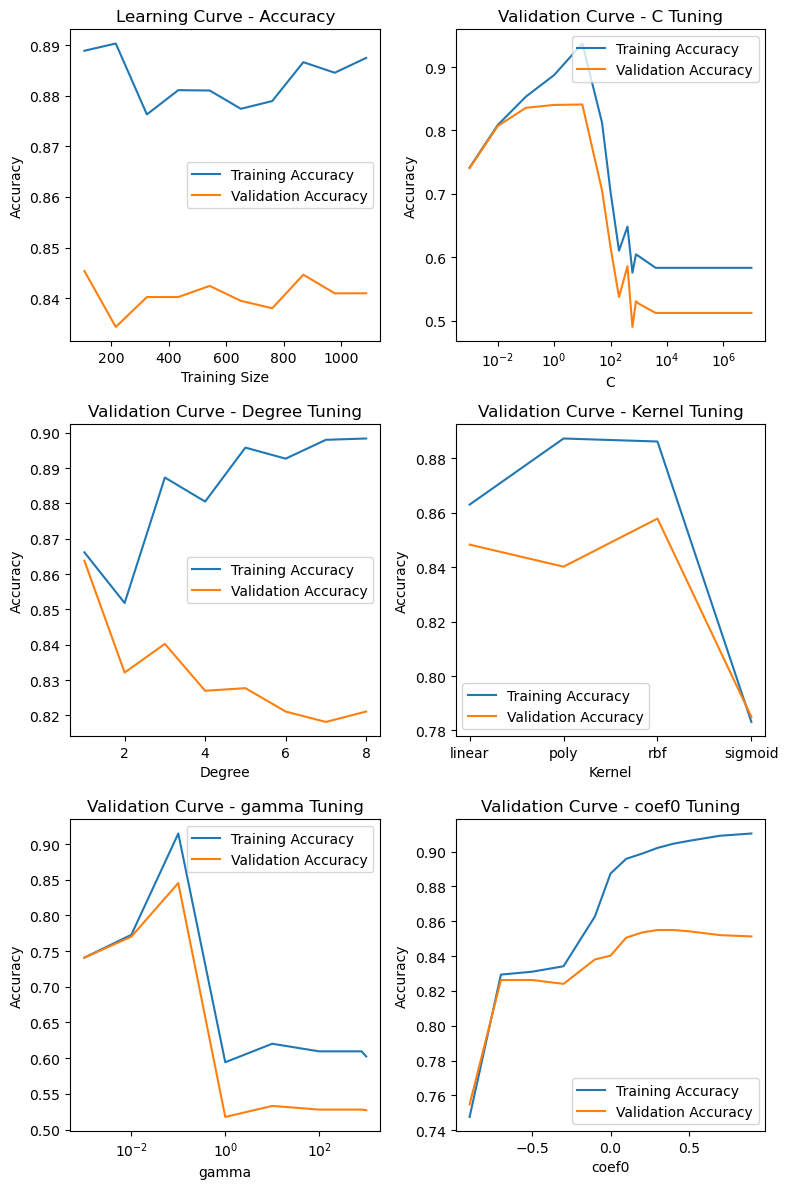

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.svm import SVC
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'disadvantaged community' is the target column and other columns are features
features = df_lead_dfw.drop(['Geography ID', 'Name', 'Is Disadvantaged Community?'], axis=1)
target = df_lead_dfw['Is Disadvantaged Community?']

# Convert 'True' and 'False' to 1 and 0
target = target.astype(int)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Set up SVM model
model = SVC(kernel='poly', max_iter=1000) #,coef0=0.5,C=0,degree=2,gamma=100)

# Learning curve: Varying training sizes
train_sizes, train_scores, test_scores, fit_times, score_times = learning_curve(
    model, X_train_scaled, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy', n_jobs=-1, return_times=True
)

# Learning curve for accuracy
plt.figure(figsize=(8, 12))
plt.subplot(3, 2, 1)
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Accuracy')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve - Accuracy')
plt.legend()

# Validation curve: C tuning:Regularization 
#The regularization strength is inversely proportional to C. 
param_range = [0.001, 0.01, 0.1, 1, 10,50, 100,200,400,600,800,1000,4000,8000,10000,100000,1000000,10000000]
train_scores, test_scores = validation_curve(
    model, X_train_scaled, y_train, param_name='C', param_range=param_range, cv=5, scoring='accuracy', n_jobs=-1
)

# Plot validation curve for C tuning
plt.subplot(3, 2, 2)
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Validation Accuracy')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Validation Curve - C Tuning')
plt.legend()


# Validation curve: degree
param_range = [1,2,3,4,5,6,7,8]
train_scores, test_scores = validation_curve(
    model, X_train_scaled, y_train, param_name='degree', param_range=param_range, cv=5, scoring='accuracy', n_jobs=-1
)

# Plot validation curve for kernel tuning
plt.subplot(3, 2, 3)
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Validation Accuracy')
plt.xlabel('Degree')
plt.ylabel('Accuracy')
plt.title('Validation Curve - Degree Tuning')
plt.legend()



# Validation curve: kernel tuning
param_range = ['linear', 'poly', 'rbf', 'sigmoid']
train_scores, test_scores = validation_curve(
    model, X_train_scaled, y_train, param_name='kernel', param_range=param_range, cv=5, scoring='accuracy', n_jobs=-1
)

# Plot validation curve for kernel tuning
plt.subplot(3, 2, 4)
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Validation Accuracy')
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title('Validation Curve - Kernel Tuning')
plt.legend()

# Validation curve: gamma tuning
param_range = [0.001,0.01,0.1,1,10,100,400,800,1000]
train_scores, test_scores = validation_curve(
    model, X_train_scaled, y_train, param_name='gamma', param_range=param_range, cv=5, scoring='accuracy', n_jobs=-1
)

# Plot validation curve for gamma tuning
plt.subplot(3, 2, 5)
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Validation Accuracy')
plt.xscale('log')
plt.xlabel('gamma')
plt.ylabel('Accuracy')
plt.title('Validation Curve - gamma Tuning')
plt.legend()


# Validation curve: coef0 tuning
param_range = [-0.9,-0.7,-0.5,-0.3,-0.1,0,0.1,0.2,0.3,0.4,0.5,0.7,0.9]
train_scores, test_scores = validation_curve(
    model, X_train_scaled, y_train, param_name='coef0', param_range=param_range, cv=5, scoring='accuracy', n_jobs=-1
)

# Plot validation curve for coef0 tuning
plt.subplot(3, 2, 6)
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Validation Accuracy')
plt.xlabel('coef0')
plt.ylabel('Accuracy')
plt.title('Validation Curve - coef0 Tuning')
plt.legend()

plt.tight_layout()
plt.savefig('SVM_curves.png')
plt.show()


### Gridsearch

C:\Users\lzowe\anaconda3\envs\SMU_cluster_analysis\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\lzowe\anaconda3\envs\SMU_cluster_analysis\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\lzowe\anaconda3\envs\SMU_cluster_analysis\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\lzowe\anaconda3\envs\SMU_cluster_analysis\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\lzowe\anaco

Best Hyperparameters: {'C': 0.1, 'coef0': -0.8, 'degree': 1, 'gamma': 0.001, 'kernel': 'linear'}
GridSearchCV model saved successfully as: svm_grid_search_model.pkl

Confusion Matrix:
[[239  16]
 [ 38  47]]


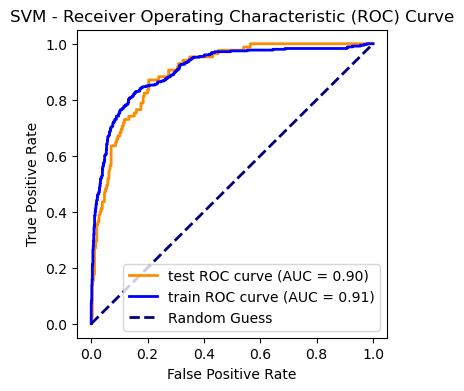

test AUC: 0.90
train AUC: 0.91
Test Accuracy:  0.84
Train Accuracy: 0.87
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90       255
           1       0.75      0.55      0.64        85

    accuracy                           0.84       340
   macro avg       0.80      0.75      0.77       340
weighted avg       0.83      0.84      0.83       340



In [41]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, classification_report
import matplotlib.pyplot as plt
import pickle

# Initialize the SVM model
model = SVC(kernel='poly', max_iter=1000,probability=True)

# Define hyperparameter grids for the model
param_grid = {'C': [0.01,  0.05, 0.08,0.1,0.2,0.3],  # Regularization parameter
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel types
              'degree': [1, 2],  # Degree of polynomial kernel (for poly kernel)
              'gamma': [0.001,0.005, 0.01, 0.05],  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
              'coef0': [-0.8,-0.7,-0.6,-0.5,-0.4]  # Independent term in kernel function (for 'poly' and 'sigmoid')
             }

# Train the model
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Print best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Save the model to disk using pickle
model_file_path = 'svm_grid_search_model.pkl'
with open(model_file_path, 'wb') as file:
    pickle.dump(grid_search, file)
print("GridSearchCV model saved successfully as:", model_file_path)

# Predictions on the test set
y_pred = grid_search.predict(X_test_scaled)

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate the probability scores for ROC curve
y_prob = grid_search.decision_function(X_test_scaled) if grid_search.best_estimator_.kernel != 'linear' else grid_search.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)


######
#train AUC
# Calculate the probability scores for ROC curve
y_prob_train = grid_search.decision_function(X_train_scaled) if grid_search.best_estimator_.kernel != 'linear' else grid_search.predict_proba(X_train_scaled)[:, 1]

# Calculate ROC curve
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_prob_train)

# Calculate AUC
roc_auc_train = auc(fpr_train, tpr_train)

# Plot ROC curve
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='test ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='train ROC curve (AUC = {:.2f})'.format(roc_auc_train))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM - Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.savefig("SVM_ROC.png")
plt.show()

# Print AUC
print('test AUC: {:.2f}'.format(roc_auc))
print('train AUC: {:.2f}'.format(roc_auc_train))

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
y_pred_train = grid_search.predict(X_train_scaled)
accuracy_train = accuracy_score(y_train, y_pred_train)

# Classification Report
classification_report_result = classification_report(y_test, y_pred)

# Print results
print(f'Test Accuracy:  {accuracy:.2f}')
print(f'Train Accuracy: {accuracy_train:.2f}')
print('Classification Report:\n', classification_report_result)


### time vs training size

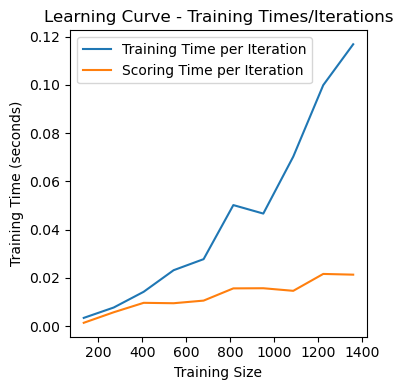

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.svm import SVC
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'disadvantaged community' is the target column and other columns are features
features = df_lead_dfw.drop(['Geography ID', 'Name', 'Is Disadvantaged Community?'], axis=1)
target = df_lead_dfw['Is Disadvantaged Community?']

# Convert 'True' and 'False' to 1 and 0
target = target.astype(int)


# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Set up SVM model
model = SVC(kernel='sigmoid', max_iter=1000) 


# Learning curve: Varying training sizes
train_sizes, train_scores, test_scores, fit_times, score_times = learning_curve(
    model, features, target, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy', n_jobs=-1, return_times=True
)

# Learning curve for accuracy
plt.figure(figsize=(4,4))
plt.plot(train_sizes, np.mean(fit_times, axis=1), label='Training Time per Iteration')
plt.plot(train_sizes, np.mean(score_times, axis=1), label='Scoring Time per Iteration')
plt.xlabel('Training Size')
plt.ylabel('Training Time (seconds)')
plt.title('Learning Curve - Training Times/Iterations')
plt.legend()
plt.tight_layout()
plt.savefig('SVM_time_curves.png')
plt.show()


## KNN
KNN is sensative to scale of data

### Learning and Validation Curves

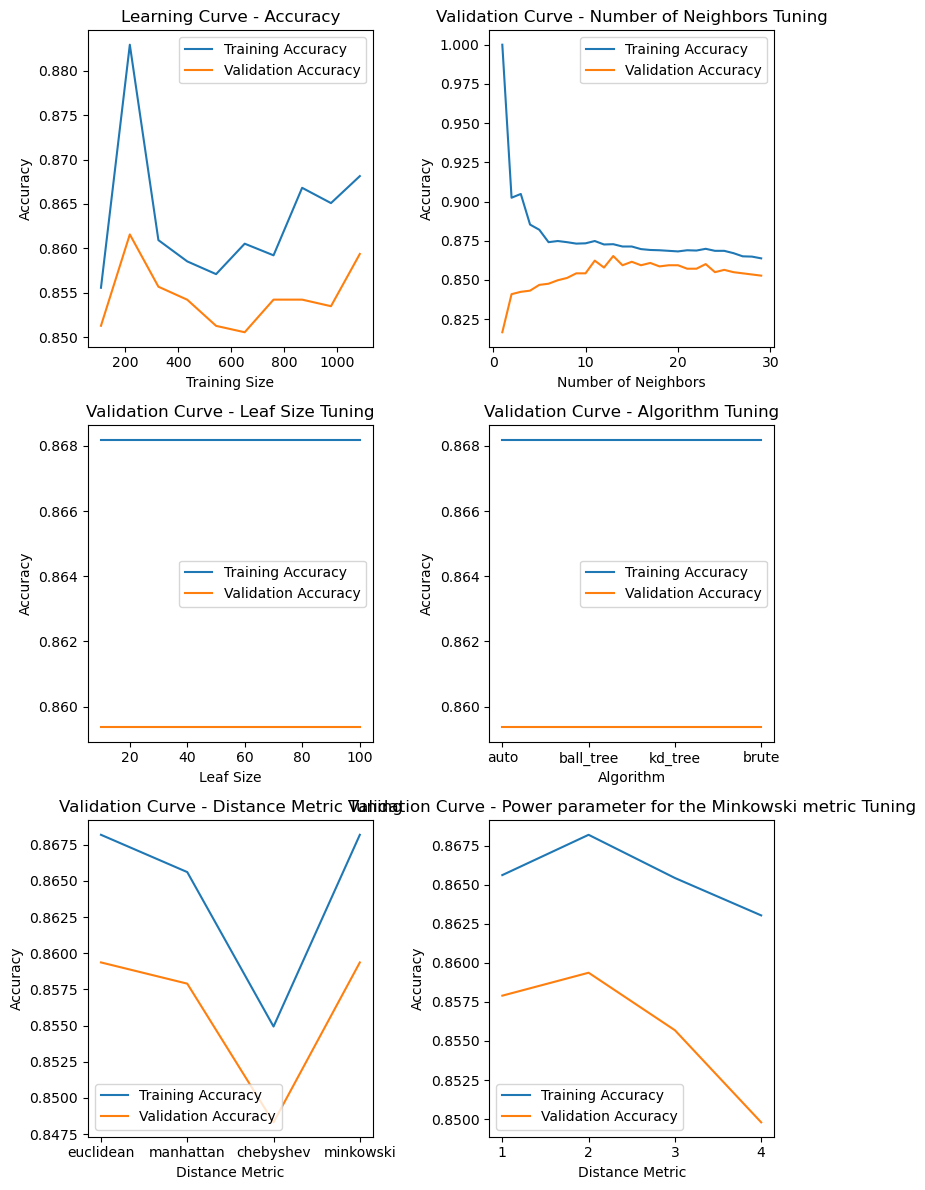

In [45]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'disadvantaged community' is the target column and other columns are features
features = df_lead_dfw.drop(['Geography ID', 'Name', 'Is Disadvantaged Community?'], axis=1)
target = df_lead_dfw['Is Disadvantaged Community?']

# Convert 'True' and 'False' to 1 and 0
target = target.astype(int)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Set up KNN model
model = KNeighborsClassifier(n_neighbors=20)

# Learning curve: Varying training sizes
train_sizes, train_scores, test_scores, fit_times, score_times = learning_curve(
    model, X_train_scaled, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy', n_jobs=-1, return_times=True
)

# Learning curve for accuracy
plt.figure(figsize=(8, 12))
plt.subplot(3, 2, 1)
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Accuracy')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve - Accuracy')
plt.legend()

# Validation curve: Number of neighbors tuning
param_range = np.arange(1, 30)
train_scores, test_scores = validation_curve(
    model, X_train_scaled, y_train, param_name='n_neighbors', param_range=param_range, cv=5, scoring='accuracy', n_jobs=-1
)

# Plot validation curve for number of neighbors tuning
plt.subplot(3, 2, 2)
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Validation Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('Validation Curve - Number of Neighbors Tuning')
plt.legend()

# Validation curve: Leaf size tuning
param_range = np.arange(10, 101, 10)
train_scores, test_scores = validation_curve(
    model, X_train_scaled, y_train, param_name='leaf_size', param_range=param_range, cv=5, scoring='accuracy', n_jobs=-1
)

# Plot validation curve for leaf size tuning
plt.subplot(3, 2, 3)
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Validation Accuracy')
plt.xlabel('Leaf Size')
plt.ylabel('Accuracy')
plt.title('Validation Curve - Leaf Size Tuning')
plt.legend()

# Validation curve: Algorithm tuning
param_range = ['auto', 'ball_tree', 'kd_tree', 'brute']
train_scores, test_scores = validation_curve(
    model, X_train_scaled, y_train, param_name='algorithm', param_range=param_range, cv=5, scoring='accuracy', n_jobs=-1
)

# Plot validation curve for algorithm tuning
plt.subplot(3, 2, 4)
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Validation Accuracy')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Validation Curve - Algorithm Tuning')
plt.legend()

# Validation curve: Distance metric tuning
param_range = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
train_scores, test_scores = validation_curve(
    model, X_train_scaled, y_train, param_name='metric', param_range=param_range, cv=5, scoring='accuracy', n_jobs=-1
)

# Plot validation curve for distance metric tuning
plt.subplot(3, 2, 5)
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Validation Accuracy')
plt.xlabel('Distance Metric')
plt.ylabel('Accuracy')
plt.title('Validation Curve - Distance Metric Tuning')
plt.legend()

# Validation curve: p tuning
param_range = [1,2,3,4]
train_scores, test_scores = validation_curve(
    model, X_train_scaled, y_train, param_name='p', param_range=param_range, cv=5, scoring='accuracy', n_jobs=-1
)

# Plot validation curve for distance metric tuning
plt.subplot(3, 2, 6)
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Validation Accuracy')
plt.xlabel('Distance Metric')
plt.ylabel('Accuracy')
plt.title('Validation Curve - Power parameter for the Minkowski metric Tuning')
plt.legend()

plt.tight_layout()
plt.savefig('KNN_curves.png')
plt.show()


### Gridsearch + classification report

Best Hyperparameters: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 15, 'p': 1}
KNN GridSearchCV model saved successfully as: knn_grid_search_model.pkl

Confusion Matrix:
[[235  20]
 [ 39  46]]


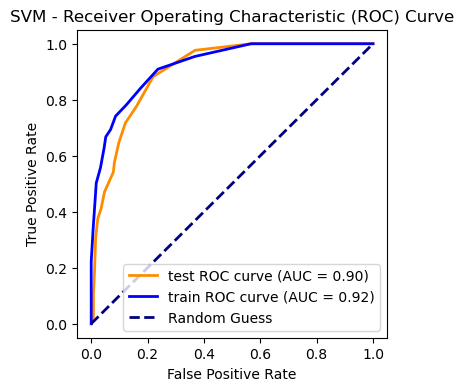

test AUC: 0.90
train AUC: 0.92
Test Accuracy:  0.83
Train Accuracy: 0.88
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89       255
           1       0.70      0.54      0.61        85

    accuracy                           0.83       340
   macro avg       0.78      0.73      0.75       340
weighted avg       0.82      0.83      0.82       340



In [50]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, classification_report
import matplotlib.pyplot as plt
import pickle

# Initialize the SVM model
model = KNeighborsClassifier(n_neighbors=20)

# Define hyperparameter grids for the model
param_grid = {'n_neighbors': [5,10,15,16,17,18,19,20],  # Number of neighbors
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm used to compute the nearest neighbors
              'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
              'p': [1, 2],  # Power parameter for the Minkowski metric (1 for Manhattan, 2 for Euclidean)
             }

# Train the model
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Print best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Save the model to disk using pickle
model_file_path = 'knn_grid_search_model.pkl'
with open(model_file_path, 'wb') as file:
    pickle.dump(grid_search, file)
print("KNN GridSearchCV model saved successfully as:", model_file_path)

# Predictions on the test set
y_pred = grid_search.predict(X_test_scaled)

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate the probability scores for ROC curve
y_prob = grid_search.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)


######
#train AUC
# Calculate the probability scores for ROC curve
y_prob_train = grid_search.predict_proba(X_train_scaled)[:, 1]
# Calculate ROC curve
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_prob_train)

# Calculate AUC
roc_auc_train = auc(fpr_train, tpr_train)

# Plot ROC curve
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='test ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='train ROC curve (AUC = {:.2f})'.format(roc_auc_train))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM - Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.savefig("KNN_ROC.png")
plt.show()

# Print AUC
print('test AUC: {:.2f}'.format(roc_auc))
print('train AUC: {:.2f}'.format(roc_auc_train))

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
y_pred_train = grid_search.predict(X_train_scaled)
accuracy_train = accuracy_score(y_train, y_pred_train)

# Classification Report
classification_report_result = classification_report(y_test, y_pred)

# Print results
print(f'Test Accuracy:  {accuracy:.2f}')
print(f'Train Accuracy: {accuracy_train:.2f}')
print('Classification Report:\n', classification_report_result)


### time vs training size

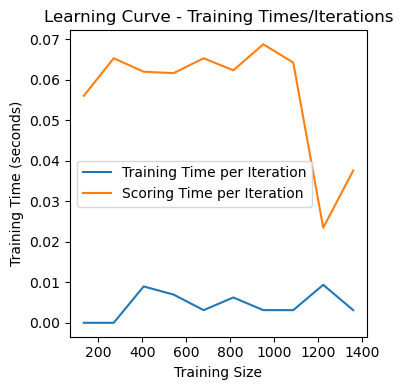

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'disadvantaged community' is the target column and other columns are features
features = df_lead_dfw.drop(['Geography ID', 'Name', 'Is Disadvantaged Community?'], axis=1)
target = df_lead_dfw['Is Disadvantaged Community?']

# Convert 'True' and 'False' to 1 and 0
target = target.astype(int)


# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Set up SVM model
model = KNeighborsClassifier(n_neighbors=20)


# Learning curve: Varying training sizes
train_sizes, train_scores, test_scores, fit_times, score_times = learning_curve(
    model, features, target, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy', n_jobs=-1, return_times=True
)

# Learning curve for accuracy
plt.figure(figsize=(4,4))
plt.plot(train_sizes, np.mean(fit_times, axis=1), label='Training Time per Iteration')
plt.plot(train_sizes, np.mean(score_times, axis=1), label='Scoring Time per Iteration')
plt.xlabel('Training Size')
plt.ylabel('Training Time (seconds)')
plt.title('Learning Curve - Training Times/Iterations')
plt.legend()
plt.tight_layout()
plt.savefig('KNN_time_curves.png')
plt.show()
